In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('hotel_booking.csv')
pd.set_option('display.max_columns',None)
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    NaN      NaN   
1                  C                4   No Deposit    NaN      NaN   
2                  C                0   No Deposit    NaN      NaN   
3                  A                0   No Deposit  304.0      NaN   
4                  A                0   No Deposit  240.0      NaN   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  \
0                          0          Check-Out              2015-07-01   
1                          0          Check-Out              2015-07-01   
2                          0          Check-Out              2015-07-02   
3                          0          Check-Out              2015-07-02   
4                          1          Check-Out              2015-07-03   

             name                        email  phone-number       credit_card  
0   Ernest Barnes  Ernest.Barnes31@outlook.com  669-792-1661  ************4322  
1    Andrea Baker       Andrea_Baker94@aol.com  858-637-6955  ************9157  
2  Rebecca Parker   Rebecca_Parker@comcast.net  652-885-2745  ************3734  
3    Laura Murray            Laura_M@gmail.com  364-656-8427  ************5677  
4     Linda Hines           LHines@verizon.com  713

# Exploratory Data Analysis

In [3]:
df.columns.sort_values()

Index(['adr', 'adults', 'agent', 'arrival_date_day_of_month',
       'arrival_date_month', 'arrival_date_week_number', 'arrival_date_year',
       'assigned_room_type', 'babies', 'booking_changes', 'children',
       'company', 'country', 'credit_card', 'customer_type',
       'days_in_waiting_list', 'deposit_type', 'distribution_channel', 'email',
       'hotel', 'is_canceled', 'is_repeated_guest', 'lead_time',
       'market_segment', 'meal', 'name', 'phone-number',
       'previous_bookings_not_canceled', 'previous_cancellations',
       'required_car_parking_spaces', 'reservation_status',
       'reservation_status_date', 'reserved_room_type', 'stays_in_week_nights',
       'stays_in_weekend_nights', 'total_of_special_requests'],
      dtype='object')

### Knowing the shape of our dataset(i.e. Rows and Columns)

In [4]:
df.shape

(119390, 36)

### Checking datatype and missing values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Summary Statistics

In [6]:
# only numerical columns will be displayed in describe method
df.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

## Exploring Duplicate and Missing data

### Checking duplicate data

In [7]:
df.duplicated().sum()

0

### Checking Missing data

In [8]:
missing_values_features = [features for features in df.columns if df[features].isnull().sum()>0]

In [9]:
missing_values_features

['children', 'country', 'agent', 'company']

In [10]:
df[missing_values_features].isnull().sum().reset_index().rename({0:'Missing_value_Count'},axis=1)

index  Missing_value_Count
0  children                    4
1   country                  488
2     agent                16340
3   company               112593

Only above four features contain missing values.

### Percentage of Missing values

In [11]:
df[missing_values_features].isnull().mean().round(5).reset_index().rename({0:'%_of_Missing_values'},axis=1)

index  %_of_Missing_values
0  children              0.00003
1   country              0.00409
2     agent              0.13686
3   company              0.94307

## Exploring Categorical and Numerical Features

### Checking Categorical data

In [12]:
Categorical_features = [features for features in df.columns if df[features].dtype == 'O']

In [13]:
Categorical_features

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date',
 'name',
 'email',
 'phone-number',
 'credit_card']

In [14]:
len(Categorical_features)

16

In [15]:
df[Categorical_features].head()

hotel arrival_date_month meal country market_segment  \
0  Resort Hotel               July   BB     PRT         Direct   
1  Resort Hotel               July   BB     PRT         Direct   
2  Resort Hotel               July   BB     GBR         Direct   
3  Resort Hotel               July   BB     GBR      Corporate   
4  Resort Hotel               July   BB     GBR      Online TA   

  distribution_channel reserved_room_type assigned_room_type deposit_type  \
0               Direct                  C                  C   No Deposit   
1               Direct                  C                  C   No Deposit   
2               Direct                  A                  C   No Deposit   
3            Corporate                  A                  A   No Deposit   
4                TA/TO                  A                  A   No Deposit   

  customer_type reservation_status reservation_status_date            name  \
0     Transient          Check-Out              2015-07-01   Ernest Barnes   
1     Transient          Check-Out              2015-07-01    Andrea Baker   
2     Transient          Check-Out              2015-07-02  Rebecca Parker   
3     Transient          Check-Out              2015-07-02    Laura Murray   
4     Transient          Check-Out              2015-07-03     Linda Hines   

                         email  phone-number       credit_card  
0  Ernest.Barnes31@outlook.com  669-792-1661  ************4322  
1       Andrea_Baker94@aol.com  858-637-6955  ************9157  
2   Rebecca_Parker@comcast.net  652-885-2745  ************3734  
3            Laura_M@gmail.com  364-656-8427  ************5677  
4           LHines@verizon.com  713-226-5883  ************5498

### Checking Numerical data

In [16]:
Numerical_features = [features for features in df.columns if df[features].dtype != 'O']
len(Numerical_features)

20

In [17]:
# using numpy array just for the sake of viewing easily/horizontally
np.array(Numerical_features)

array(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults',
       'children', 'babies', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'agent', 'company', 'days_in_waiting_list',
       'adr', 'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='<U30')

In [18]:
df[Numerical_features].head()

is_canceled  lead_time  arrival_date_year  arrival_date_week_number  \
0            0        342               2015                        27   
1            0        737               2015                        27   
2            0          7               2015                        27   
3            0         13               2015                        27   
4            0         14               2015                        27   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                          1                        0                     0   
1                          1                        0                     0   
2                          1                        0                     1   
3                          1                        0                     1   
4                          1                        0                     2   

   adults  children  babies  is_repeated_guest  previous_cancellations  \
0       2       0.0       0                  0                       0   
1       2       0.0       0                  0                       0   
2       1       0.0       0                  0                       0   
3       1       0.0       0                  0                       0   
4       2       0.0       0                  0                       0   

   previous_bookings_not_canceled  booking_changes  agent  company  \
0                               0                3    NaN      NaN   
1                               0                4    NaN      NaN   
2                               0                0    NaN      NaN   
3                               0                0  304.0      NaN   
4                               0                0  240.0      NaN   

   days_in_waiting_list   adr  required_car_parking_spaces  \
0                     0   0.0                            0   
1                     0   0.0                            0   
2                     0  75.0                            0   
3                     0  75.0                            0   
4                     0  98.0                            0   

   total_of_special_requests  
0                          0  
1                          0  
2                          0  
3                          0  
4                          1

## Exploring Distribution of Target(is_canceled) variable

In [19]:
df['is_canceled'].value_counts(normalize=True).reset_index().rename({'index':'is_canceled','is_canceled':'%_of_values'},axis=1)

is_canceled  %_of_values
0            0     0.629584
1            1     0.370416

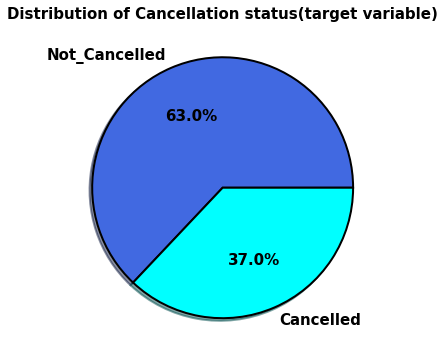

In [20]:
plt.figure(figsize=(12,6))
labels = [ 'Not_Cancelled', 'Cancelled']
proportion = df['is_canceled'].value_counts()
plt.title('Distribution of Cancellation status(target variable)', size=15, weight='bold')
plt.pie(proportion,labels=labels, autopct='%1.1f%%',shadow=True,colors = ['royalblue','cyan'],
        wedgeprops = {"edgecolor" : "black",
                      'linewidth': 2,
                      'antialiased': True},
       textprops={'size':15, 'weight':'bold',})

plt.show()

## Exploring Skewness

In [21]:
df.skew(skipna=True)

is_canceled                        0.536678
lead_time                          1.346550
arrival_date_year                 -0.232583
arrival_date_week_number          -0.010014
arrival_date_day_of_month         -0.002000
stays_in_weekend_nights            1.380046
stays_in_week_nights               2.862249
adults                            18.317805
children                           4.112590
babies                            24.646545
is_repeated_guest                  5.326315
previous_cancellations            24.458049
previous_bookings_not_canceled    23.539800
booking_changes                    6.000270
agent                              1.089386
company                            0.601600
days_in_waiting_list              11.944353
adr                               10.530214
required_car_parking_spaces        4.163233
total_of_special_requests          1.349189
dtype: float64

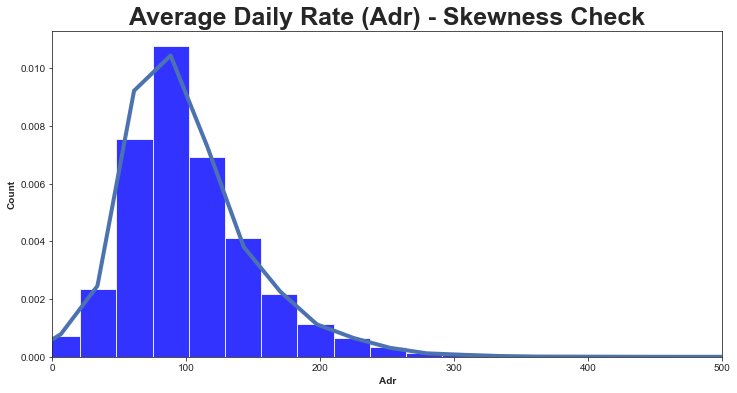

In [22]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
a = sns.distplot(df['adr'], kde_kws={'lw':4}, bins=200, color='b', hist_kws= {'alpha':0.8,})
a.set_title('Average Daily Rate (Adr) - Skewness Check',fontsize=25, weight = 'bold')
a.set_xlabel("Adr", weight='bold')
a.set_ylabel("Count", weight='bold')
sns.set(font_scale=1.5)
a.set_xlim(0,500)
plt.show()

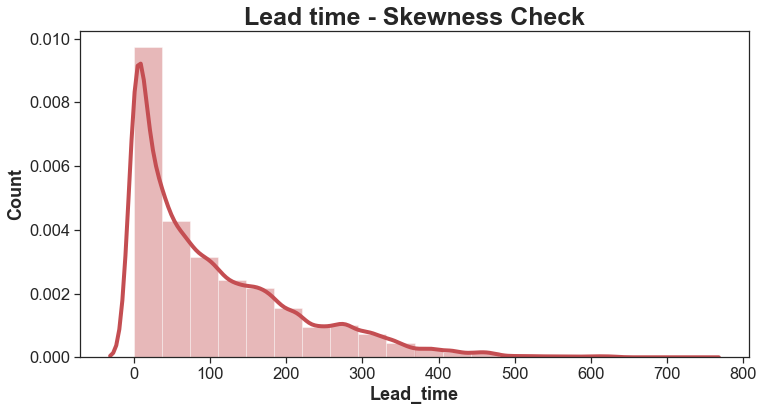

In [23]:
# fig, ax = plt.subplots()
plt.figure(figsize=(12,6))
sns.set_style('ticks')
a = sns.distplot(df['lead_time'], kde_kws={'lw':4}, bins=20, color='r', hist_kws= {'alpha':0.4})
a.set_title('Lead time - Skewness Check', fontsize=25, weight = 'bold')
a.set_xlabel("Lead_time", weight='bold')
a.set_ylabel("Count", weight='bold')
sns.set(font_scale=1.5)
# plt.show()

By looking at the above 2 graphs, we can conclude that the data is not normal so we need to 
apply log transformation in order to make it Normal.

## Data Visualization

1. Home Country of Guests
2. Busiest month
3. Overall Booking Cancellation in both Hotels
4. Analyzing Month with most Cancellations
5. Market Segment Distribution
6. Customers type Distribution
7. Deposit Type Distribution
8. Average Daily Rating (adr) vs Arrival Date Month
9. Repeated Guests Distribution
10. Total_of_special_requests Distribution
11. Required Car Parking Spaces Distribution
12. Meal Type Distribution
13. Booking Changes Distribution
14. Average Daily Rate (Adr) vs Market Type
15. Average Daily Rate (Adr) vs Deposit Type
16. Average Daily Rate (Adr) vs Customer Type
17. Average Daily Rate (Adr) Monthwise
18. Leadtime Yearly
19. Leadtime vs Average Daily Rating (adr)

### 1. Home Country of Guests

In [24]:
country_df = df[df['is_canceled'] == 0].groupby(['country']).size().sort_values(ascending=False).reset_index()
country_df.rename({0:'Guests'}, axis=1, inplace=True)
country_df[:5]

country  Guests
0     PRT   21071
1     GBR    9676
2     FRA    8481
3     ESP    6391
4     DEU    6069

In [25]:
import plotly.express as px

fig = px.choropleth(country_df, 
                    locations=country_df["country"],
                    color=country_df["Guests"],
                    hover_name=country_df["country"],
                    title='Home Countries of Guests',
                   )
fig.update_layout(
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="Black",
)
fig.show()

In [26]:
country = df['country'].value_counts(normalize=True)[:10]
country

PRT    0.408656
GBR    0.102008
FRA    0.087593
ESP    0.072059
DEU    0.061286
ITA    0.031673
IRL    0.028385
BEL    0.019697
BRA    0.018704
NLD    0.017695
Name: country, dtype: float64

Text(0, 0.5, 'Reservation Count')

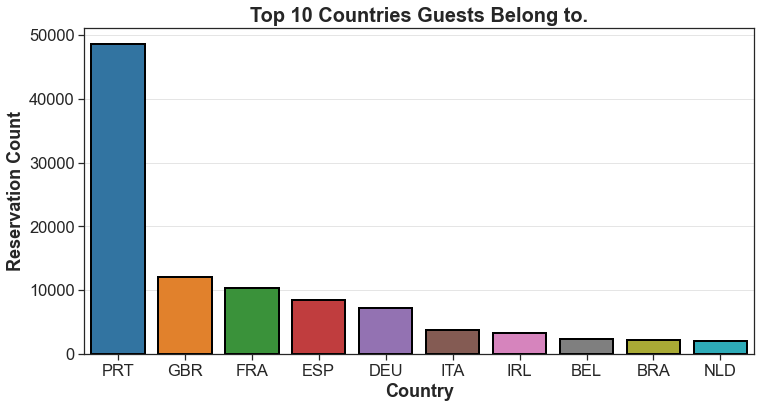

In [27]:
plt.figure(figsize=(12, 6))
sns.set_style('ticks')
ax = sns.countplot(x='country', 
                   data=df, 
                   order=country.index,
                   palette=sns.color_palette("tab10"),
                   lw=2,
                   ec='black')
plt.grid(alpha=0.5, axis='y')
ax.set_title('Top 10 Countries Guests Belong to.', size=20, weight='bold')
ax.set_xlabel('Country', weight='bold')
ax.set_ylabel('Reservation Count', weight='bold')

## 2. Busiest month

In [28]:
df['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

In [29]:
df['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

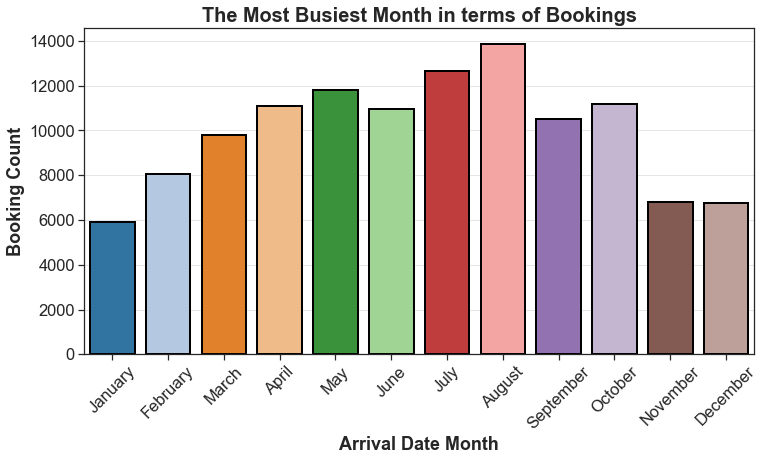

In [30]:
plt.figure(figsize=(12, 6))
sns.set_style('ticks')
ordered = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ax = sns.countplot(x='arrival_date_month', 
                   data=df, 
                   order=ordered,
                   palette=sns.color_palette("tab20"),
                   lw=2,
                   ec='black')
plt.grid(alpha=0.5, axis='y')
ax.set_title('The Most Busiest Month in terms of Bookings', size=20, weight='bold')
ax.set_xlabel('Arrival Date Month', weight='bold')
ax.set_ylabel('Booking Count', weight='bold')
plt.xticks(rotation=45)
plt.show()

## 3. Overall Booking Cancellation in both Hotels

In [31]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [32]:
# in term of Percentage
df.groupby('is_canceled')['hotel'].value_counts(normalize=True)

is_canceled  hotel       
0            City Hotel      0.615012
             Resort Hotel    0.384988
1            City Hotel      0.748508
             Resort Hotel    0.251492
Name: hotel, dtype: float64

In [33]:
# in term of number
df.groupby('is_canceled')['hotel'].value_counts(normalize=False)

is_canceled  hotel       
0            City Hotel      46228
             Resort Hotel    28938
1            City Hotel      33102
             Resort Hotel    11122
Name: hotel, dtype: int64

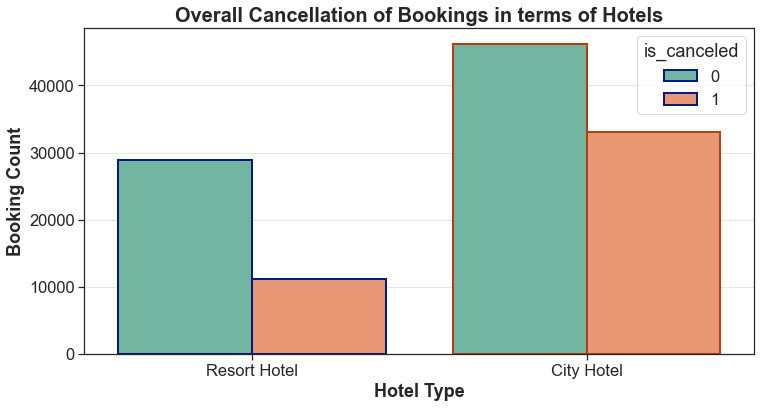

In [34]:
plt.figure(figsize=(12, 6))
sns.set_style('ticks')
ax = sns.countplot(x='hotel', 
                   data=df, 
                   hue='is_canceled',
                   palette=sns.color_palette("Set2"),
                   lw=2,
                   edgecolor=sns.color_palette("dark", 3))
plt.grid(alpha=0.5, axis='y')
ax.set_title('Overall Cancellation of Bookings in terms of Hotels', size=20, weight='bold')
ax.set_xlabel('Hotel Type', weight='bold')
ax.set_ylabel('Booking Count', weight='bold')
plt.show()

## 4. Analyzing Month with most Cancellations

In [35]:
# ONLY cancelled bookings monthwise
month_df=df[df['is_canceled']==1].groupby(['arrival_date_month']).size().sort_values(ascending=False).reset_index().rename(columns={0:'Total Cancellations'})
month_df

arrival_date_month  Total Cancellations
0              August                 5239
1                July                 4742
2                 May                 4677
3                June                 4535
4               April                 4524
5             October                 4246
6           September                 4116
7               March                 3149
8            February                 2696
9            December                 2371
10           November                 2122
11            January                 1807

In [36]:
# ALL bookings monthwise
df.groupby(['arrival_date_month']).size().sort_values(ascending=False).reset_index().rename(columns={0:'Total Bookings'})

arrival_date_month  Total Bookings
0              August           13877
1                July           12661
2                 May           11791
3             October           11160
4               April           11089
5                June           10939
6           September           10508
7               March            9794
8            February            8068
9            November            6794
10           December            6780
11            January            5929

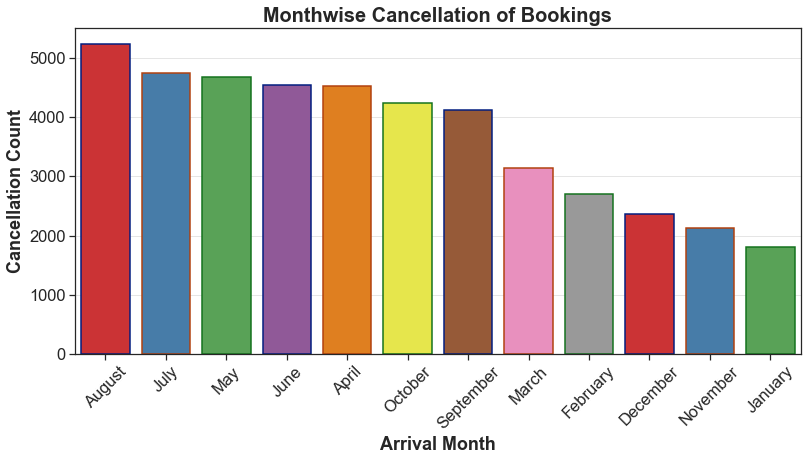

In [37]:
plt.figure(figsize=(13, 6))
sns.set_style('ticks')
# ordered = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
#            'August', 'September', 'October', 'November', 'December']
ax = sns.countplot(x='arrival_date_month', 
                   data=df[df['is_canceled']==1],
                   order=month_df['arrival_date_month'],                   
                   palette=sns.color_palette("Set1"),
                   lw=1.5,
                   edgecolor=sns.color_palette("dark", 3),)
plt.grid(alpha=0.5, axis='y',)
ax.set_title('Monthwise Cancellation of Bookings', size=20, weight='bold')
ax.set_xlabel('Arrival Month', weight='bold')
ax.set_ylabel('Cancellation Count', weight='bold')
plt.xticks(rotation=45)
# plt.legend(loc='upper left', fontsize='small')
plt.show()

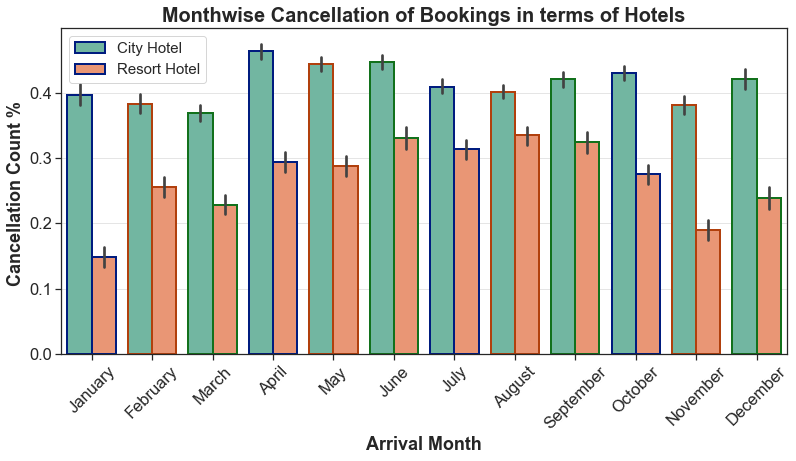

In [38]:
plt.figure(figsize=(13, 6))
sns.set_style('ticks')
ordered = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
           'August', 'September', 'October', 'November', 'December']
ax = sns.barplot(x='arrival_date_month', 
                 y='is_canceled',
                 data=df, 
                 order=ordered,
                 hue='hotel',
                 hue_order=['City Hotel', 'Resort Hotel'],
                 palette=sns.color_palette("Set2"),
                 lw=2,
                 edgecolor=sns.color_palette("dark", 3))
plt.grid(alpha=0.5, axis='y',)
ax.set_title('Monthwise Cancellation of Bookings in terms of Hotels', size=20, weight='bold')
ax.set_xlabel('Arrival Month', weight='bold')
ax.set_ylabel('Cancellation Count % ', weight='bold')
plt.xticks(rotation=45)
plt.legend(loc='upper left', fontsize='small')
plt.show()

## 5. Market Segment Distribution

In [39]:
df['is_canceled'].groupby(df['market_segment']).value_counts(normalize=True)

market_segment  is_canceled
Aviation        0              0.780591
                1              0.219409
Complementary   0              0.869448
                1              0.130552
Corporate       0              0.812653
                1              0.187347
Direct          0              0.846581
                1              0.153419
Groups          1              0.610620
                0              0.389380
Offline TA/TO   0              0.656840
                1              0.343160
Online TA       0              0.632789
                1              0.367211
Undefined       1              1.000000
Name: is_canceled, dtype: float64

In [40]:
df['is_canceled'].groupby(df['market_segment']).value_counts(normalize=False)

market_segment  is_canceled
Aviation        0                185
                1                 52
Complementary   0                646
                1                 97
Corporate       0               4303
                1                992
Direct          0              10672
                1               1934
Groups          1              12097
                0               7714
Offline TA/TO   0              15908
                1               8311
Online TA       0              35738
                1              20739
Undefined       1                  2
Name: is_canceled, dtype: int64

In [41]:
pd.crosstab(df['is_canceled'], df['market_segment'],)

market_segment  Aviation  Complementary  Corporate  Direct  Groups  \
is_canceled                                                          
0                    185            646       4303   10672    7714   
1                     52             97        992    1934   12097   

market_segment  Offline TA/TO  Online TA  Undefined  
is_canceled                                          
0                       15908      35738          0  
1                        8311      20739          2

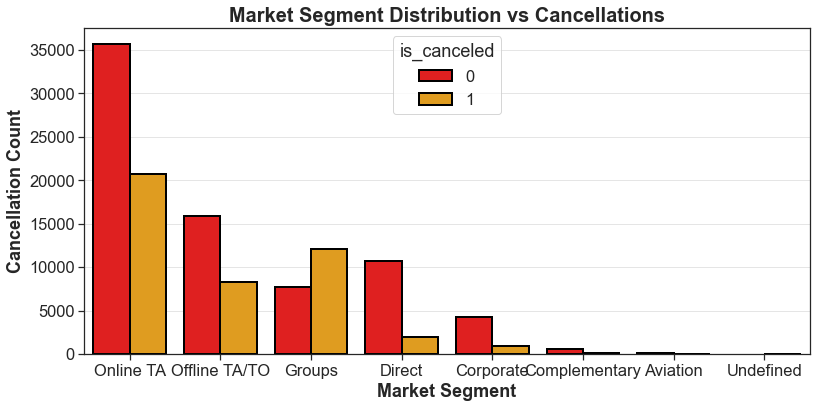

In [42]:
plt.figure(figsize=(13, 6))
sns.set_style('ticks')
ax = sns.countplot(x='market_segment',
                   data=df,
                   hue='is_canceled',
                   order=df['market_segment'].value_counts(sort=True).index,
                   palette=sns.color_palette(['red','orange'],3),
                   lw=2,
                   ec='black',)
plt.grid(alpha=0.5, axis='y',)
ax.set_title('Market Segment Distribution vs Cancellations', size=20, weight='bold')
ax.set_xlabel('Market Segment', weight='bold')
ax.set_ylabel('Cancellation Count', weight='bold')
plt.show()

## 6. Customers type Distribution

In [43]:
df['customer_type'].value_counts(normalize=True)

Transient          0.750591
Transient-Party    0.210436
Contract           0.034140
Group              0.004833
Name: customer_type, dtype: float64

In [44]:
df.groupby('customer_type')['is_canceled'].value_counts()

customer_type    is_canceled
Contract         0               2814
                 1               1262
Group            0                518
                 1                 59
Transient        0              53099
                 1              36514
Transient-Party  0              18735
                 1               6389
Name: is_canceled, dtype: int64

In [45]:
# getting the index values and sorting accordingly in the count plot
df['customer_type'].value_counts(sort=True).index

Index(['Transient', 'Transient-Party', 'Contract', 'Group'], dtype='object')

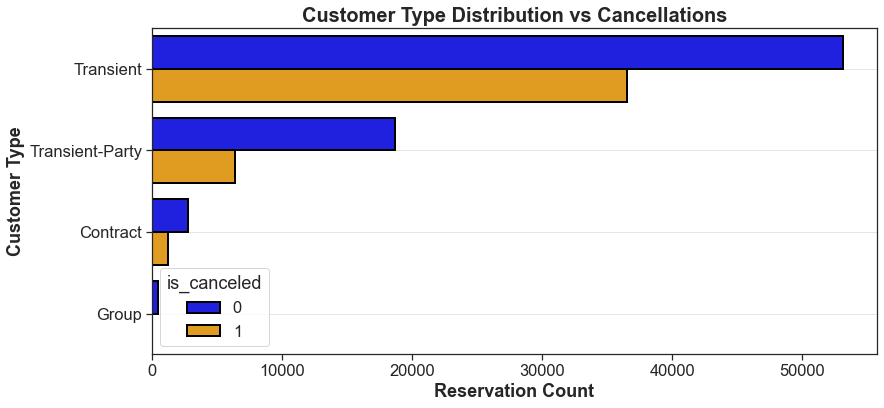

In [46]:
plt.figure(figsize=(13, 6))
sns.set_style('ticks')
ax = sns.countplot(y='customer_type',
                   data=df,
                   hue='is_canceled',
                   order=df['customer_type'].value_counts(sort=True).index,
                   palette=sns.color_palette(['blue','orange'],3),
                   lw=2,
                   ec='black',)
plt.grid(alpha=0.5, axis='y',)
ax.set_title('Customer Type Distribution vs Cancellations', size=20, weight='bold')
ax.set_xlabel('Reservation Count', weight='bold')
ax.set_ylabel('Customer Type', weight='bold')
plt.show()

## 7. Deposit Type Distribution

In [47]:
df['deposit_type'].value_counts(normalize=True)

No Deposit    0.876464
Non Refund    0.122179
Refundable    0.001357
Name: deposit_type, dtype: float64

In [48]:
df.groupby(['deposit_type'])['is_canceled'].value_counts()

deposit_type  is_canceled
No Deposit    0              74947
              1              29694
Non Refund    1              14494
              0                 93
Refundable    0                126
              1                 36
Name: is_canceled, dtype: int64

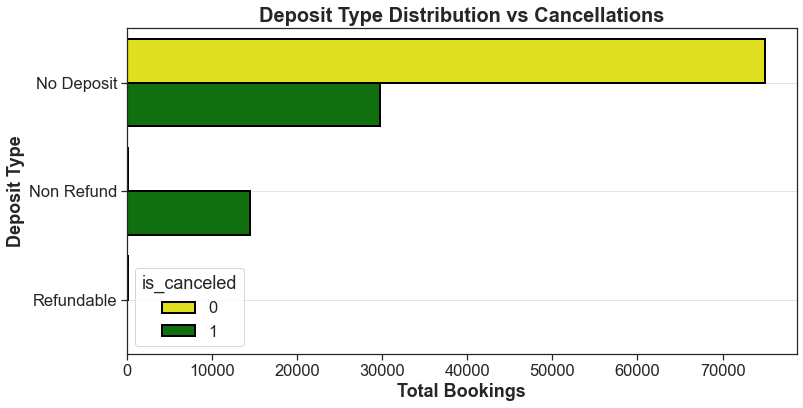

In [49]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.countplot(y='deposit_type',
                  data=df,
                  hue='is_canceled',
                  order=df['deposit_type'].value_counts(sort=True).index,
                  palette=['yellow', 'green'],
                  lw=2,
                  ec='black')
plt.grid(alpha=0.5, axis='y',)
ax.set_title('Deposit Type Distribution vs Cancellations', size=20, weight='bold')
ax.set_xlabel('Total Bookings', weight='bold')
ax.set_ylabel('Deposit Type', weight='bold')
plt.show()

## 8. Average Daily Rating (adr) vs Arrival Date Month

In [50]:
pd.Categorical(df['arrival_date_month'], categories=ordered, ordered=True)

['July', 'July', 'July', 'July', 'July', ..., 'August', 'August', 'August', 'August', 'August']
Length: 119390
Categories (12, object): ['January' < 'February' < 'March' < 'April' ... 'September' < 'October' < 'November' < 'December']

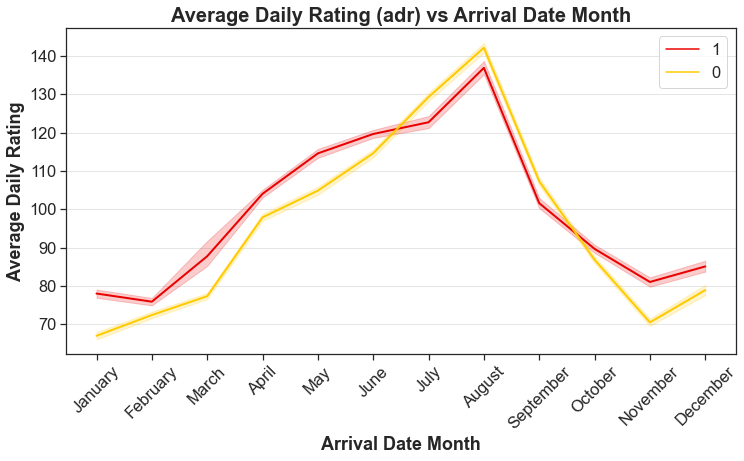

In [51]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ordered = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=ordered, ordered=True)
ax = sns.lineplot(x='arrival_date_month',
                  y='adr',
                  hue='is_canceled',
                  hue_order=[1,0],
                  data=df,
                  palette='hot',
                  lw=2,)
plt.grid(alpha=0.5, axis='y',)
ax.set_title('Average Daily Rating (adr) vs Arrival Date Month', size=20, weight='bold')
ax.set_xlabel('Arrival Date Month', weight='bold')
ax.set_ylabel('Average Daily Rating', weight='bold')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

## 9. Repeated Guests Distribution

In [52]:
df['is_repeated_guest'].value_counts(normalize=True)

0    0.968088
1    0.031912
Name: is_repeated_guest, dtype: float64

In [53]:
df.groupby(['is_repeated_guest'])['is_canceled'].value_counts()

is_repeated_guest  is_canceled
0                  0              71908
                   1              43672
1                  0               3258
                   1                552
Name: is_canceled, dtype: int64

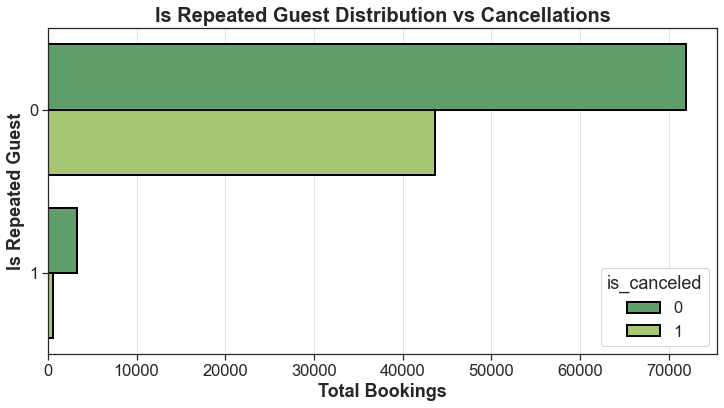

In [54]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.countplot(y='is_repeated_guest',
                  data=df,
                  hue='is_canceled',
#                   order=df['deposit_type'].value_counts(sort=True).index,
                  palette='summer',
                  lw=2,
                  ec='black')
plt.grid(alpha=0.5, axis='x',)
ax.set_title('Is Repeated Guest Distribution vs Cancellations', size=20, weight='bold')
ax.set_xlabel('Total Bookings', weight='bold')
ax.set_ylabel('Is Repeated Guest', weight='bold')
plt.show()

## 10. Total_of_special_requests Distribution

In [55]:
df.groupby(['total_of_special_requests'])['is_canceled'].value_counts()

total_of_special_requests  is_canceled
0                          0              36762
                           1              33556
1                          0              25908
                           1               7318
2                          0              10103
                           1               2866
3                          0               2051
                           1                446
4                          0                304
                           1                 36
5                          0                 38
                           1                  2
Name: is_canceled, dtype: int64

In [56]:
df['total_of_special_requests'].value_counts(normalize=True)

0    0.588977
1    0.278298
2    0.108627
3    0.020915
4    0.002848
5    0.000335
Name: total_of_special_requests, dtype: float64

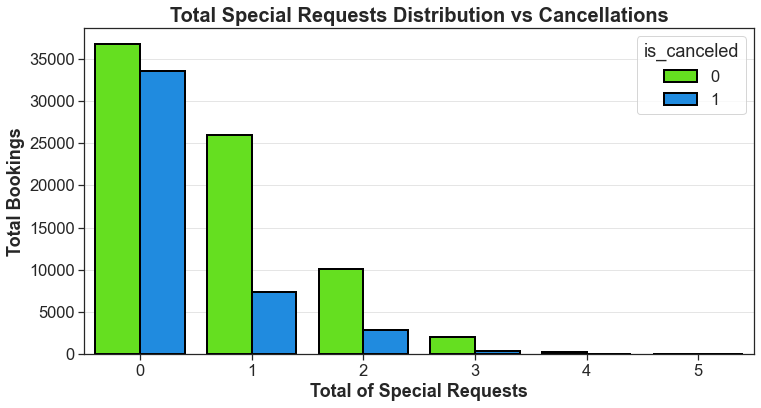

In [57]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.countplot(x='total_of_special_requests',
                  data=df,
                  hue='is_canceled',
                  palette='gist_rainbow',
                  lw=2,
                  ec='black')
plt.grid(alpha=0.5, axis='y',)
ax.set_title('Total Special Requests Distribution vs Cancellations', size=20, weight='bold')
ax.set_xlabel('Total of Special Requests', weight='bold')
ax.set_ylabel('Total Bookings', weight='bold')
plt.show()

## 11. Required Car Parking Spaces Distribution

In [58]:
df.groupby(['required_car_parking_spaces'])['is_canceled'].value_counts(normalize=True)

required_car_parking_spaces  is_canceled
0                            0              0.605051
                             1              0.394949
1                            0              1.000000
2                            0              1.000000
3                            0              1.000000
8                            0              1.000000
Name: is_canceled, dtype: float64

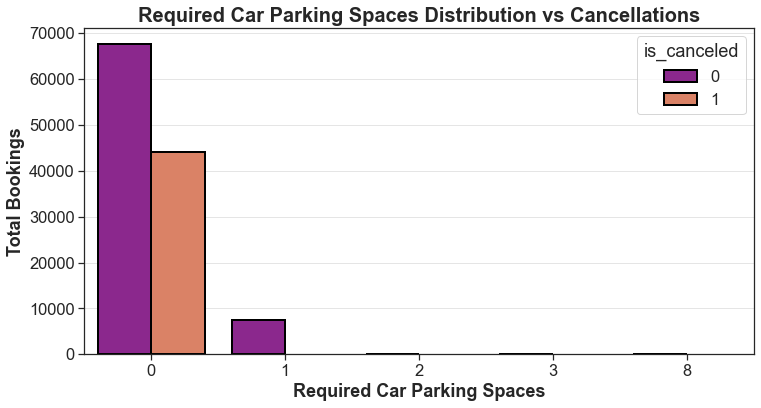

In [59]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.countplot(x='required_car_parking_spaces',
                  data=df,
                  hue='is_canceled',
                  palette='plasma',
                  lw=2,
                  ec='black')
plt.grid(alpha=0.5, axis='y',)
ax.set_title('Required Car Parking Spaces Distribution vs Cancellations', size=20, weight='bold')
ax.set_xlabel('Required Car Parking Spaces', weight='bold')
ax.set_ylabel('Total Bookings', weight='bold')
plt.show()

## 12. Meal Type Distribution

In [60]:
df.groupby(['meal'])['is_canceled'].value_counts(normalize=True)

meal       is_canceled
BB         0              0.626151
           1              0.373849
FB         1              0.598997
           0              0.401003
HB         0              0.655397
           1              0.344603
SC         0              0.627606
           1              0.372394
Undefined  0              0.755346
           1              0.244654
Name: is_canceled, dtype: float64

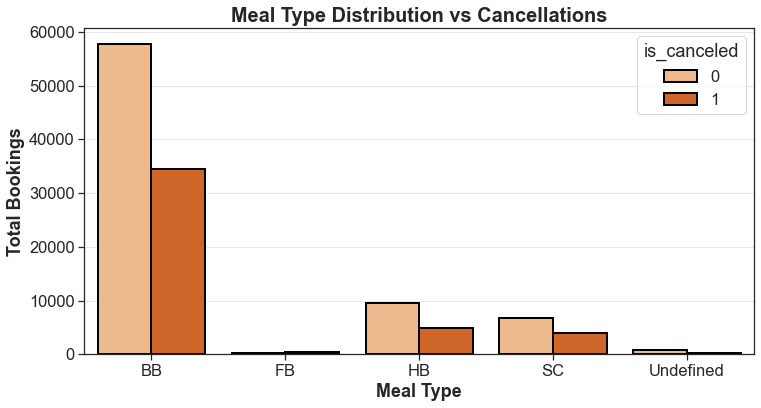

In [61]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.countplot(x='meal',
                  data=df,
                  hue='is_canceled',
                  palette='Oranges',
                  lw=2,
                  ec='black')
plt.grid(alpha=0.5, axis='y',)
ax.set_title('Meal Type Distribution vs Cancellations', size=20, weight='bold')
ax.set_xlabel('Meal Type', weight='bold')
ax.set_ylabel('Total Bookings', weight='bold')
plt.show()

Favorite Meal of Customers

In [62]:
df[df['is_canceled']==0]['meal'].value_counts().reset_index()[:3]

index   meal
0    BB  57800
1    HB   9479
2    SC   6684

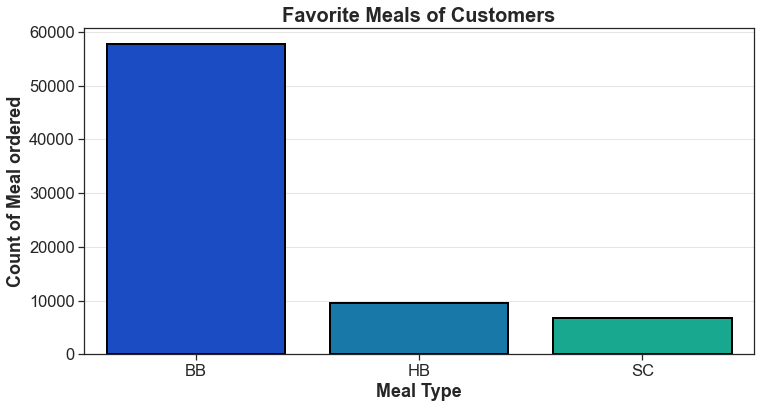

In [63]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.countplot(x='meal',
                  data=df[df['is_canceled']==0],
                    order=pd.value_counts(df['meal']).iloc[:3].index,
                  palette='winter',
                  lw=2,
                  ec='black')
plt.grid(alpha=0.5, axis='y',)
ax.set_title('Favorite Meals of Customers', size=20, weight='bold')
ax.set_xlabel('Meal Type', weight='bold')
ax.set_ylabel('Count of Meal ordered', weight='bold')
plt.show()

We can see that **Favorite Meal** of Customers is **BB**.

## 13. Booking Changes Distribution

In [64]:
df.groupby(['booking_changes'])['is_canceled'].value_counts(normalize=True)[:10]

booking_changes  is_canceled
0                0              0.591458
                 1              0.408542
1                0              0.857728
                 1              0.142272
2                0              0.798686
                 1              0.201314
3                0              0.844660
                 1              0.155340
4                0              0.821809
                 1              0.178191
Name: is_canceled, dtype: float64

In [65]:
df['booking_changes'].value_counts().index[:5]

Int64Index([0, 1, 2, 3, 4], dtype='int64')

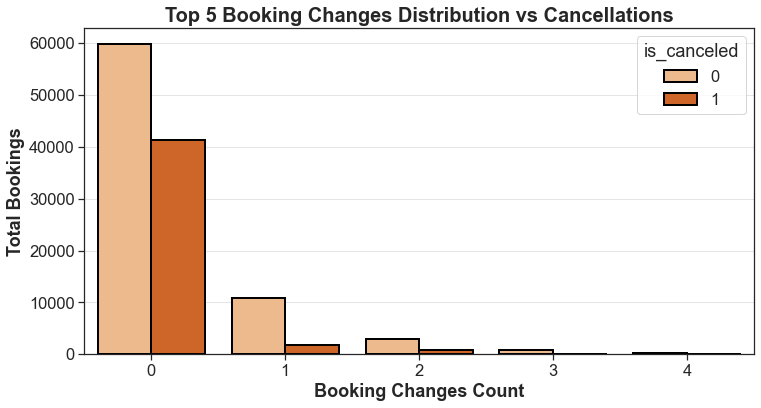

In [66]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.countplot(x='booking_changes',
                  data=df,
                  hue='is_canceled',
                  order=df['booking_changes'].value_counts().index[:5],
                  palette='Oranges',
                  lw=2,
                  ec='black')
plt.grid(alpha=0.5, axis='y',)
ax.set_title('Top 5 Booking Changes Distribution vs Cancellations', size=20, weight='bold')
ax.set_xlabel('Booking Changes Count', weight='bold')
ax.set_ylabel('Total Bookings', weight='bold')
plt.show()

## 14. Average Daily Rate (Adr) vs Market Type

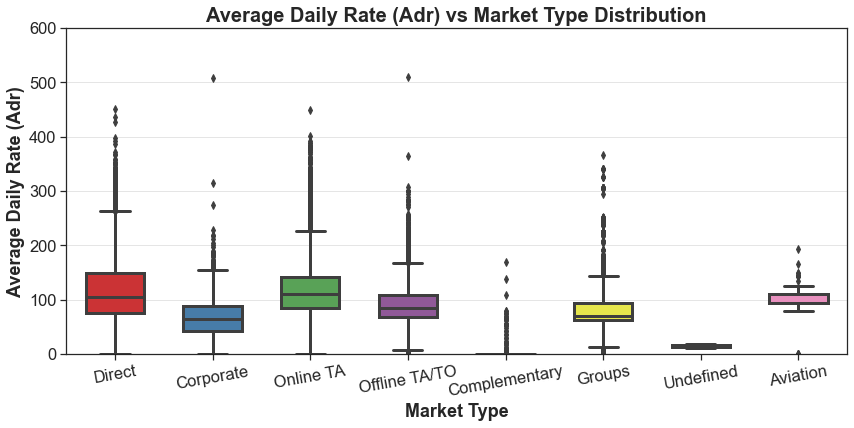

In [67]:
plt.figure(figsize=(14,6))
sns.set_style('ticks')
ax = sns.boxplot(x='market_segment',
                 y='adr',
                 data=df,
#                  hue='is_canceled',
#                  order=df['booking_changes'].value_counts().index[:5],
                 palette='Set1',
                width=.6,
                linewidth=3)
plt.grid(alpha=0.5, axis='y',)
ax.set_title('Average Daily Rate (Adr) vs Market Type Distribution', size=20, weight='bold')
ax.set_xlabel('Market Type', weight='bold')
ax.set_ylabel('Average Daily Rate (Adr)', weight='bold')
ax.set_ylim(0,600)
plt.xticks(rotation=10)
plt.show()

## 15. Average Daily Rate (Adr) vs Deposit Type

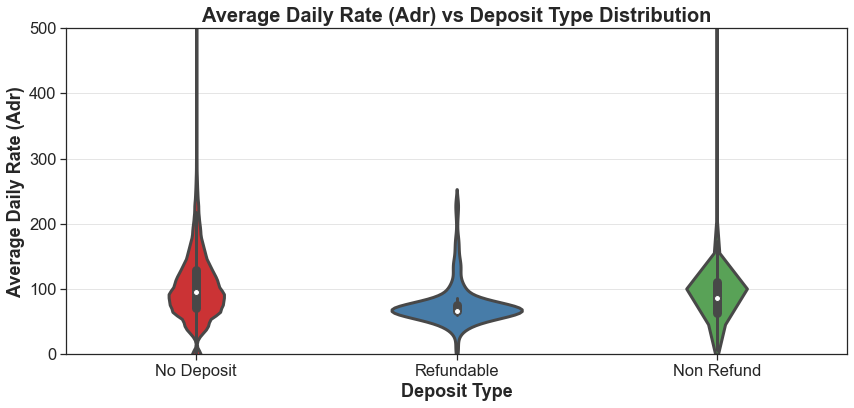

In [68]:
plt.figure(figsize=(14,6))
sns.set_style('ticks')
ax = sns.violinplot(x='deposit_type',
                 y='adr',
                 data=df,
                 palette='Set1',
                width=.5,
                linewidth=3)
plt.grid(alpha=0.5, axis='y',)
ax.set_title('Average Daily Rate (Adr) vs Deposit Type Distribution', size=20, weight='bold')
ax.set_xlabel('Deposit Type', weight='bold')
ax.set_ylabel('Average Daily Rate (Adr)', weight='bold')
ax.set_ylim(0,500)
# plt.xticks(rotation=10)
plt.show()

## 16. Average Daily Rate (Adr) vs Customer Type

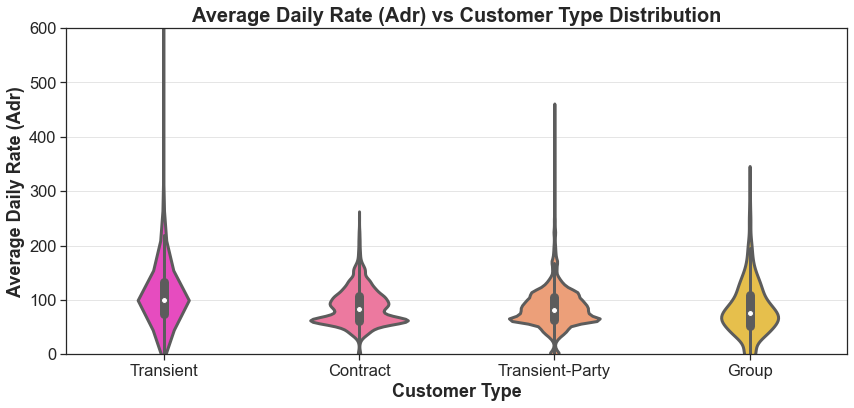

In [69]:
plt.figure(figsize=(14,6))
sns.set_style('ticks')
ax = sns.violinplot(x='customer_type',
                 y='adr',
                 data=df,
                 palette='spring',
                width=.5,
                linewidth=3)
plt.grid(alpha=0.5, axis='y',)
ax.set_title('Average Daily Rate (Adr) vs Customer Type Distribution', size=20, weight='bold')
ax.set_xlabel('Customer Type', weight='bold')
ax.set_ylabel('Average Daily Rate (Adr)', weight='bold')
ax.set_ylim(0,600)
# plt.xticks(rotation=10)
plt.show()

## 17. Average Daily Rate (Adr) Monthwise

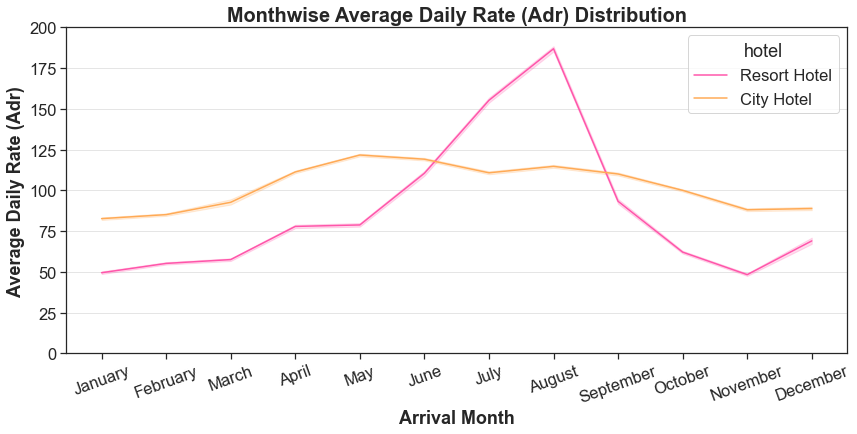

In [70]:
plt.figure(figsize=(14,6))
sns.set_style('ticks')
ax = sns.lineplot(x='arrival_date_month',
                 y='adr',
                 data=df,
                  hue='hotel',
                 palette='spring',)
plt.grid(alpha=0.5, axis='y',)
ax.set_title('Monthwise Average Daily Rate (Adr) Distribution', size=20, weight='bold')
ax.set_xlabel('Arrival Month', weight='bold')
ax.set_ylabel('Average Daily Rate (Adr)', weight='bold')
ax.set_ylim(0,200)
plt.xticks(rotation=20)
plt.show()

## 18. Leadtime Yearly

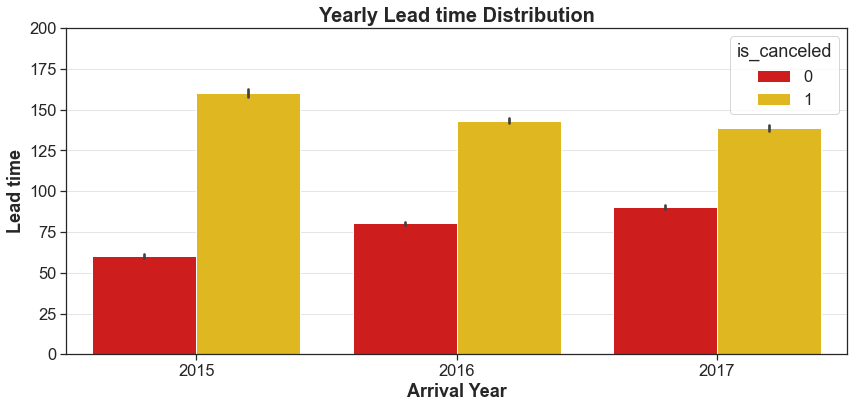

In [71]:
plt.figure(figsize=(14,6))
sns.set_style('ticks')
ax = sns.barplot(x='arrival_date_year',
                 y='lead_time',
                 data=df,
                 hue='is_canceled',
                 palette='hot',)
plt.grid(alpha=0.5, axis='y',)
ax.set_title('Yearly Lead time Distribution', size=20, weight='bold')
ax.set_xlabel('Arrival Year', weight='bold')
ax.set_ylabel('Lead time', weight='bold')
ax.set_ylim(0,200)
# plt.xticks(rotation=20)
plt.show()

## 19. Leadtime vs Average Daily Rating (adr)

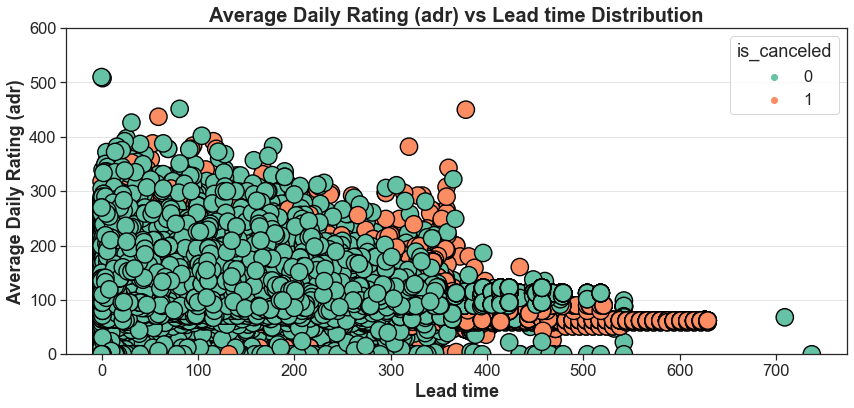

In [72]:
plt.figure(figsize=(14,6))
sns.set_style('ticks')
ax = sns.scatterplot(x='lead_time',
                 y='adr',
                 data=df,
                 hue='is_canceled',
                 s=300,
                 palette='Set2',
                 ec='black')
plt.grid(alpha=0.5, axis='y',)
ax.set_title('Average Daily Rating (adr) vs Lead time Distribution', size=20, weight='bold')
ax.set_xlabel('Lead time', weight='bold')
ax.set_ylabel('Average Daily Rating (adr)', weight='bold')
ax.set_ylim(0,600)
# plt.xticks(rotation=20)
plt.show()

## Data Preprocessing

## Handling Missing values

In [73]:
# missing_values_features already defined above
df[missing_values_features].isnull().mean().round(5)

children    0.00003
country     0.00409
agent       0.13686
company     0.94307
dtype: float64

From the above table output, we can fix missing values by:  
(childern) --> using fillna with zeros simply considering guest had no childern.  
(country) --> using mode  
(agent) --> using mode  
(company) --> dropping it

In [74]:
df[missing_values_features].isnull().sum()

children         4
country        488
agent        16340
company     112593
dtype: int64

In [75]:
# fixing childern column
df['children'].fillna(0, inplace=True)

In [76]:
# fixing country and agent column
df['agent'].fillna(df['agent'].value_counts().index[0], inplace=True)
df['country'].fillna(df['country'].value_counts().index[0], inplace=True)

In [77]:
# dropping company column
df.drop('company', axis=1, inplace=True)

In [78]:
missing_values_features.remove('company')

In [79]:
df[missing_values_features].isnull().sum()

children    0
country     0
agent       0
dtype: int64

In [80]:
df1 = df.copy()

## Handling Categorical Features (Encoding Features)

In [81]:
df1[Categorical_features].head()

hotel arrival_date_month meal country market_segment  \
0  Resort Hotel               July   BB     PRT         Direct   
1  Resort Hotel               July   BB     PRT         Direct   
2  Resort Hotel               July   BB     GBR         Direct   
3  Resort Hotel               July   BB     GBR      Corporate   
4  Resort Hotel               July   BB     GBR      Online TA   

  distribution_channel reserved_room_type assigned_room_type deposit_type  \
0               Direct                  C                  C   No Deposit   
1               Direct                  C                  C   No Deposit   
2               Direct                  A                  C   No Deposit   
3            Corporate                  A                  A   No Deposit   
4                TA/TO                  A                  A   No Deposit   

  customer_type reservation_status reservation_status_date            name  \
0     Transient          Check-Out              2015-07-01   Ernest Barnes   
1     Transient          Check-Out              2015-07-01    Andrea Baker   
2     Transient          Check-Out              2015-07-02  Rebecca Parker   
3     Transient          Check-Out              2015-07-02    Laura Murray   
4     Transient          Check-Out              2015-07-03     Linda Hines   

                         email  phone-number       credit_card  
0  Ernest.Barnes31@outlook.com  669-792-1661  ************4322  
1       Andrea_Baker94@aol.com  858-637-6955  ************9157  
2   Rebecca_Parker@comcast.net  652-885-2745  ************3734  
3            Laura_M@gmail.com  364-656-8427  ************5677  
4           LHines@verizon.com  713-226-5883  ************5498

In [82]:
# unique categories
for feature in Categorical_features:
    print(f'{feature} : {len(df1[feature].unique())} unique categories')

hotel : 2 unique categories
arrival_date_month : 12 unique categories
meal : 5 unique categories
country : 177 unique categories
market_segment : 8 unique categories
distribution_channel : 5 unique categories
reserved_room_type : 10 unique categories
assigned_room_type : 12 unique categories
deposit_type : 3 unique categories
customer_type : 4 unique categories
reservation_status : 3 unique categories
reservation_status_date : 926 unique categories
name : 81503 unique categories
email : 115889 unique categories
phone-number : 119390 unique categories
credit_card : 9000 unique categories


In [83]:
len(Categorical_features)

16

In [84]:
# removing irrelevant column for predictions
df1.drop(['name', 'email', 'phone-number', 'credit_card'], axis=1, inplace=True)

In [85]:
Cat_features = []
for i in Categorical_features:
    if i not in ['name', 'email', 'phone-number', 'credit_card']:
        Cat_features.append(i)

In [86]:
len(Cat_features)

12

In [87]:
Cat_features

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [88]:
df1['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [89]:
# replacing as per in data description kaggle
df1['meal'].replace('Undefined', 'SC', inplace=True)

In [90]:
df1['meal'].unique()

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

In [91]:
# using sklearn for Label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [92]:
df1[Cat_features].head()

hotel arrival_date_month meal country market_segment  \
0  Resort Hotel               July   BB     PRT         Direct   
1  Resort Hotel               July   BB     PRT         Direct   
2  Resort Hotel               July   BB     GBR         Direct   
3  Resort Hotel               July   BB     GBR      Corporate   
4  Resort Hotel               July   BB     GBR      Online TA   

  distribution_channel reserved_room_type assigned_room_type deposit_type  \
0               Direct                  C                  C   No Deposit   
1               Direct                  C                  C   No Deposit   
2               Direct                  A                  C   No Deposit   
3            Corporate                  A                  A   No Deposit   
4                TA/TO                  A                  A   No Deposit   

  customer_type reservation_status reservation_status_date  
0     Transient          Check-Out              2015-07-01  
1     Transient          Check-Out              2015-07-01  
2     Transient          Check-Out              2015-07-02  
3     Transient          Check-Out              2015-07-02  
4     Transient          Check-Out              2015-07-03

In [93]:
# before encoding
for feature in Cat_features:
    print(f'{feature} : {len(df1[feature].unique())} unique categories')

hotel : 2 unique categories
arrival_date_month : 12 unique categories
meal : 4 unique categories
country : 177 unique categories
market_segment : 8 unique categories
distribution_channel : 5 unique categories
reserved_room_type : 10 unique categories
assigned_room_type : 12 unique categories
deposit_type : 3 unique categories
customer_type : 4 unique categories
reservation_status : 3 unique categories
reservation_status_date : 926 unique categories


In [94]:
for feature in Cat_features:
    df1[feature] = le.fit_transform(df1[feature])

In [95]:
# after encoding
for feature in Cat_features:
    print(f'{feature} : {len(df1[feature].unique())} unique categories')

hotel : 2 unique categories
arrival_date_month : 12 unique categories
meal : 4 unique categories
country : 177 unique categories
market_segment : 8 unique categories
distribution_channel : 5 unique categories
reserved_room_type : 10 unique categories
assigned_room_type : 12 unique categories
deposit_type : 3 unique categories
customer_type : 4 unique categories
reservation_status : 3 unique categories
reservation_status_date : 926 unique categories


In [96]:
# just to verify
df1['meal'].unique(), df1.hotel.unique()

(array([0, 1, 2, 3]), array([1, 0]))

In [97]:
df1.head()

hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
0      1            0        342               2015                   5   
1      1            0        737               2015                   5   
2      1            0          7               2015                   5   
3      1            0         13               2015                   5   
4      1            0         14               2015                   5   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

   meal  country  market_segment  distribution_channel  is_repeated_guest  \
0     0      135               3                     1                  0   
1     0      135               3                     1                  0   
2     0       59               3                     1                  0   
3     0       59               2                     0                  0   
4     0       59               6                     3                  0   

   previous_cancellations  previous_bookings_not_canceled  reserved_room_type  \
0                       0                               0                   2   
1                       0                               0                   2   
2                       0                               0                   0   
3                       0                               0                   0   
4                       0                               0                   0   

   assigned_room_type  booking_changes  deposit_type  agent  \
0                   2                3             0    9.0   
1                   2                4             0    9.0   
2                   2                0             0    9.0   
3                   0                0             0  304.0   
4                   0                0             0  240.0   

   days_in_waiting_list  customer_type   adr  required_car_parking_spaces  \
0                     0              2   0.0                            0   
1                     0              2   0.0                            0   
2                     0              2  75.0                            0   
3                     0              2  75.0                            0   
4                     0              2  98.0                            0   

   total_of_special_requests  reservation_status  reservation_status_date  
0                          0                   1                      121  
1                          0                   1                      121  
2                          0                   1                      122  
3                          0                   1                      122  
4                          1                   1                      123

In [98]:
df.shape, df1.shape

((119390, 35), (119390, 31))

In [99]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int32  
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int32  
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [100]:
df2 = df1.copy()

## Handling Skewness

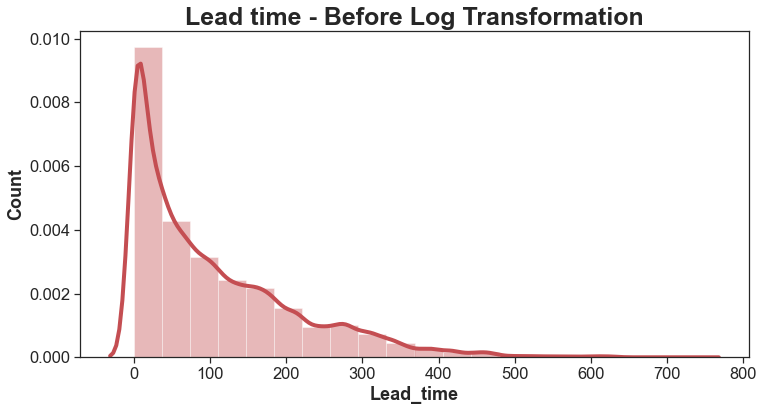

In [101]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.distplot(df['lead_time'], kde_kws={'lw':4}, bins=20, color='r', hist_kws= {'alpha':0.4})
ax.set_title('Lead time - Before Log Transformation', fontsize=25, weight = 'bold')
ax.set_xlabel("Lead_time", weight='bold')
ax.set_ylabel("Count", weight='bold')
sns.set(font_scale=1.5)
# plt.show()

using numpy log function applying lograthmic transfromation because it is right skewed.

In [102]:
df2['lead_time']=np.log1p(df2['lead_time'])

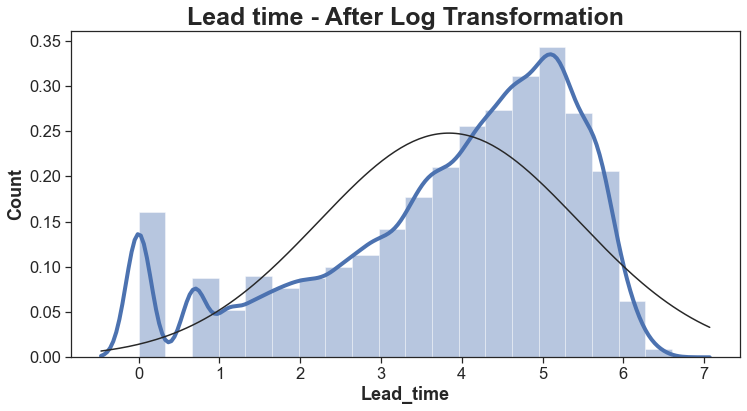

In [103]:
from scipy.stats import norm
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.distplot(df2['lead_time'], kde_kws={'lw':4}, bins=20, color='b', fit=norm, hist_kws= {'alpha':0.4})
ax.set_title('Lead time - After Log Transformation', fontsize=25, weight = 'bold')
ax.set_xlabel("Lead_time", weight='bold')
ax.set_ylabel("Count", weight='bold')
sns.set(font_scale=1.5)
# plt.show()

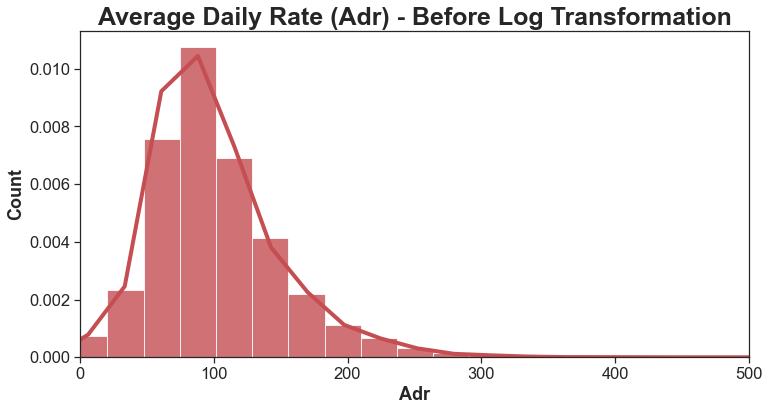

In [104]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
a = sns.distplot(df['adr'], kde_kws={'lw':4}, bins=200, color='r', hist_kws= {'alpha':0.8,})
a.set_title('Average Daily Rate (Adr) - Before Log Transformation',fontsize=25, weight = 'bold')
a.set_xlabel("Adr", weight='bold')
a.set_ylabel("Count", weight='bold')
sns.set(font_scale=1.5)
a.set_xlim(0,500)
plt.show()

In [105]:
# applying log transform on 'adr' column
df2['adr']=np.log1p(df2['adr'])

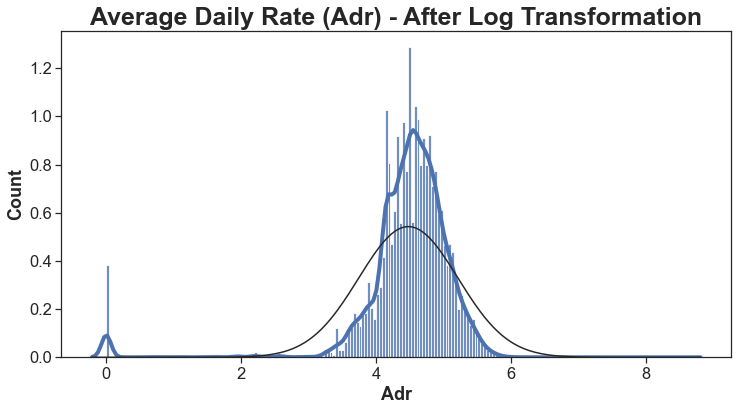

In [106]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
a = sns.distplot(df2['adr'], kde_kws={'lw':4}, bins=200, fit=norm, color='b', hist_kws= {'alpha':0.8,})
a.set_title('Average Daily Rate (Adr) - After Log Transformation',fontsize=25, weight = 'bold')
a.set_xlabel("Adr", weight='bold')
a.set_ylabel("Count", weight='bold')
sns.set(font_scale=1.5)
# a.set_xlim(0,1000)
plt.show()

In [107]:
normal_data = df2.copy()

## Correlation check

In [108]:
normal_data.corr()['is_canceled'].sort_values(ascending=False)

is_canceled                       1.000000
deposit_type                      0.468634
lead_time                         0.320063
country                           0.267502
distribution_channel              0.167600
previous_cancellations            0.110133
adr                               0.083091
adults                            0.060017
market_segment                    0.059338
days_in_waiting_list              0.054186
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
children                          0.005036
arrival_date_month               -0.001491
stays_in_weekend_nights          -0.001791
arrival_date_day_of_month        -0.006130
meal                             -0.015693
babies                           -0.032491
agent                            -0.049857
previous_bookings_not_canceled   -0.057358
reserved_room_type               -0.061282
customer_type                    -0.068140
is_repeated

Text(0.5, 1.0, 'Correlation b/w Dependent and Independent features')

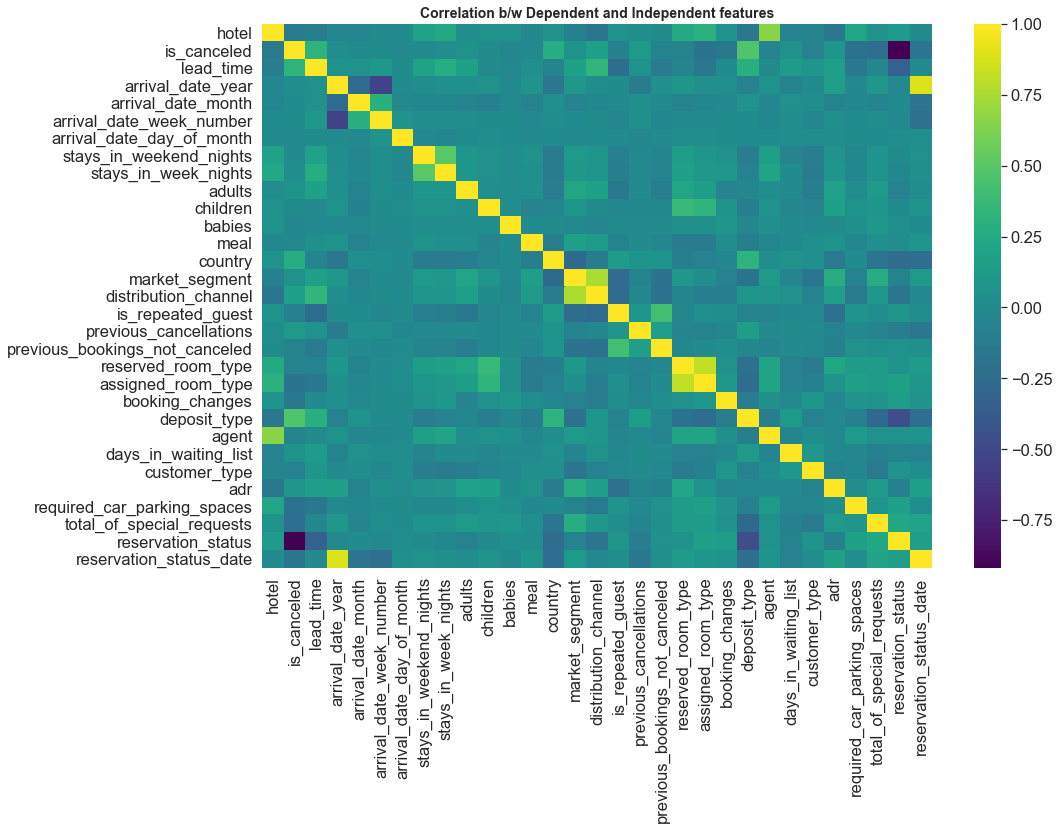

In [109]:
plt.figure(figsize=(15,10))
ax=sns.heatmap(normal_data.corr(), cmap='viridis',)
ax.set_title('Correlation b/w Dependent and Independent features', fontsize=14, weight='bold')

Reservation Status is highly negatively correlated with the target variable possibly resulting into wrong prediction or overfitting, so drop this.  
Some more columns are of less importance in predictions like: [arrival_date_year, arrival_date_week_number, arrival_date_month, stays_in_week_nights, stays_in_weekend_nights, reservation_status_date, reservation_status]

In [110]:
normal_data.drop(['arrival_date_year', 'arrival_date_week_number', 'arrival_date_month', 'stays_in_week_nights', 'stays_in_weekend_nights', 'reservation_status_date', 'reservation_status'],
                axis=1,
                inplace=True)

In [111]:
final=normal_data.copy()

In [112]:
final.shape

(119390, 24)

In [113]:
final.head()

hotel  is_canceled  lead_time  arrival_date_day_of_month  adults  children  \
0      1            0   5.837730                          1       2       0.0   
1      1            0   6.603944                          1       2       0.0   
2      1            0   2.079442                          1       1       0.0   
3      1            0   2.639057                          1       1       0.0   
4      1            0   2.708050                          1       2       0.0   

   babies  meal  country  market_segment  distribution_channel  \
0       0     0      135               3                     1   
1       0     0      135               3                     1   
2       0     0       59               3                     1   
3       0     0       59               2                     0   
4       0     0       59               6                     3   

   is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  \
0                  0                       0                               0   
1                  0                       0                               0   
2                  0                       0                               0   
3                  0                       0                               0   
4                  0                       0                               0   

   reserved_room_type  assigned_room_type  booking_changes  deposit_type  \
0                   2                   2                3             0   
1                   2                   2                4             0   
2                   0                   2                0             0   
3                   0                   0                0             0   
4                   0                   0                0             0   

   agent  days_in_waiting_list  customer_type       adr  \
0    9.0                     0              2  0.000000   
1    9.0                     0              2  0.000000   
2    9.0                     0              2  4.330733   
3  304.0                     0              2  4.330733   
4  240.0                     0              2  4.595120   

   required_car_parking_spaces  total_of_special_requests  
0                            0                          0  
1                            0                          0  
2                            0                          0  
3                            0                          0  
4                            0                          1

In [114]:
final.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_day_of_month         0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               1
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

In [115]:
final.dropna(inplace=True)

In [116]:
final.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_day_of_month         0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

In [117]:
x = final.drop('is_canceled', axis=1)
y = final['is_canceled']

In [118]:
x.head()

hotel  lead_time  arrival_date_day_of_month  adults  children  babies  \
0      1   5.837730                          1       2       0.0       0   
1      1   6.603944                          1       2       0.0       0   
2      1   2.079442                          1       1       0.0       0   
3      1   2.639057                          1       1       0.0       0   
4      1   2.708050                          1       2       0.0       0   

   meal  country  market_segment  distribution_channel  is_repeated_guest  \
0     0      135               3                     1                  0   
1     0      135               3                     1                  0   
2     0       59               3                     1                  0   
3     0       59               2                     0                  0   
4     0       59               6                     3                  0   

   previous_cancellations  previous_bookings_not_canceled  reserved_room_type  \
0                       0                               0                   2   
1                       0                               0                   2   
2                       0                               0                   0   
3                       0                               0                   0   
4                       0                               0                   0   

   assigned_room_type  booking_changes  deposit_type  agent  \
0                   2                3             0    9.0   
1                   2                4             0    9.0   
2                   2                0             0    9.0   
3                   0                0             0  304.0   
4                   0                0             0  240.0   

   days_in_waiting_list  customer_type       adr  required_car_parking_spaces  \
0                     0              2  0.000000                            0   
1                     0              2  0.000000                            0   
2                     0              2  4.330733                            0   
3                     0              2  4.330733                            0   
4                     0              2  4.595120                            0   

   total_of_special_requests  
0                          0  
1                          0  
2                          0  
3                          0  
4                          1

In [119]:
x.shape

(119389, 23)

In [120]:
y.shape

(119389,)